# mrbles pipeline example

## Load necessary modules

In [298]:
import os
import importlib
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import mrbles

# For fancy interactive Plotly graphs
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tools
from plotly.tools import FigureFactory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # For plotly offline mode
# Set plotly to notebook mode
init_notebook_mode(connected=True)
py.sign_in('bjornharink_stanford', 'VqISgcHFwPkY0z50PG47')

In [362]:
importlib.reload(mrbles)
importlib.reload(mrbles.data)
importlib.reload(mrbles.core)
importlib.reload(mrbles.pipeline)
importlib.reload(mrbles)

Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford
Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford


<module 'mrbles' from 'G:\\My Drive\\[Stanford]\\DEV\\Encoded Beads Project\\Bead Analysis\\mrbles\\__init__.py'>

## Load image set

The dictionary keys of image folders and image pattersn must match.
The instatiatiation of the object will search for the files. An error is thrown if no images are found.

In [3]:
image_folders = {
    "mrbles-test-set": r"../data",
    "mrbles-test-set-2": r"../data",
}
image_patterns = {
    "mrbles-test-set": r"peptide_biotin_streptavidin_([0-9][0-9])_MMStack_Pos0.ome.tif",
    "mrbles-test-set-2": r"peptide_biotin_streptavidin_([0-9][0-9])_MMStack_Pos0.ome.tif"
}
mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
mrbles_images.crop_x = slice(90, 990)
mrbles_images.crop_y = slice(90, 990)

In [4]:
image_folder = r"C:\DATA\Huy"
image_folders = {"50 nM" : r"C:\DATA\Huy", 
                 "100 nM" : r"C:\DATA\Huy",
                 "250 nM" : "C:\DATA\Huy",
                 "500 nM" : r"C:\DATA\Huy",
                 "1000 nM" : r"C:\DATA\Huy"
}
image_patterns = {"50 nM" : r"20170726_HQN_CN_PxI2_1Step_50nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
                  "100 nM" : r"20170726_HQN_CN_PxI2_1Step_100nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "250 nM" : "20170726_HQN_CN_PxI2_1Step_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "500 nM" : r"20170726_HQN_CN_PxI2_1Step_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "1000 nM" : r"20170726_HQN_CN_PxI2_1Step_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
}
mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
mrbles_images.crop_x = slice(90, 990)
mrbles_images.crop_y = slice(90, 990)

In [2]:
image_folders = {"63 nM" : r"C:\DATA\Huy\20180111 CN", 
                 "125 nM" : r"C:\DATA\Huy\20180111 CN",
                 "250 nM" : r"C:\DATA\Huy\20180111 CN",
                 "500 nM" : r"C:\DATA\Huy\20180111 CN",
                 "1000 nM" : r"C:\DATA\Huy\20180111 CN",
                 "2000 nM" : r"C:\DATA\Huy\20180111 CN",
                 "Biotin" : r"C:\DATA\Huy\20180111 CN",
                 "NIR" : r"C:\DATA\Huy\20180111 CN"
}
image_patterns = {"63 nM" : r"20180111_CN_Final_Normal_p49_63nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
                  "125 nM" : r"20180111_CN_Final_Normal_p49_125nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "250 nM" : "20180111_CN_Final_Normal_p49_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "500 nM" : r"20180111_CN_Final_Normal_p49_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "1000 nM" : r"20180111_CN_Final_Normal_p49_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "2000 nM" : r"20180111_CN_Final_Normal_p49_2uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "NIR" : r"20180111_CN_Final_Normal_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
}
mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
mrbles_images.crop_x = slice(90, 990)
mrbles_images.crop_y = slice(90, 990)

In [7]:
# image_folders = {
#     "mrbles-test-set": r"Z:\Data\Setup 1\Alex\96codes_20171205made_20171213image\96codes_allchannels_imaging_20171213",
#     "mrbles-test-set-2": r"Z:\Data\Setup 1\Alex\96codes_20171205made_20171213image\96codes_allchannels_imaging_20171213",
# }
# image_patterns = {
#     "mrbles-test-set": r"96codes20171205_([0-9][0-9])_MMStack_Pos0.ome.tif",
#     "mrbles-test-set-2": r"96codes20171205_([0-9][0-9])_MMStack_Pos0.ome.tif"
# }
# mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
# mrbles_images.crop_x = slice(90, 990)
# mrbles_images.crop_y = slice(90, 990)

If no error was thrown the images can be loaded into memory.

In [3]:
mrbles_images.load()
mrbles_images.rename_channel('Cy5-E 10%', 'Cy5')

By calling the object the Xarray content is displayed.

The internal Xarray DataArray can be sliced using Xarray syntax (similar to Pandas).
```python
mrbles_images['set name', file number, 'channel name', y-slice, x-slice]
```

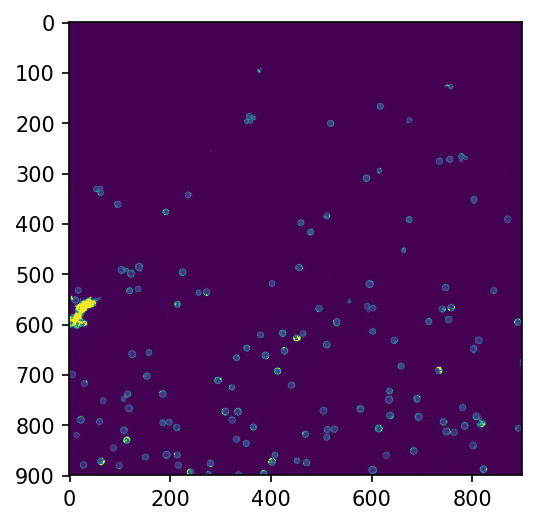

In [4]:
plt.figure(dpi=150)
plt.imshow(mrbles_images['Biotin', 20, 'Cy5']);

## Find MRBLEs in images

Instatiate a MBRLEs finding object, giving initial bead_size (pixels), which must be set. More fine-tune settings can be set by calling object.settings.area_max etc. Otherwise, default settings are used.

In [4]:
find_mrbles = mrbles.Find(bead_size=14, border_clear=True, circle_size=350)
find_mrbles.settings.eccen_max = 0.65

In [5]:
mrbles_images_combined = find_mrbles.find(mrbles_images[:, : , 'Brightfield'], combine_data=mrbles_images)

In [6]:
find_mrbles.beads_total

11163

In [7]:
find_mrbles.beads_per_set

{'1000 nM': 1339,
 '125 nM': 903,
 '2000 nM': 1125,
 '250 nM': 1206,
 '500 nM': 1310,
 '63 nM': 1212,
 'Biotin': 3223,
 'NIR': 845}

In [8]:
find_mrbles.bead_dims.radius.mean()*2

14.370512247073028

TypeError: Invalid dimensions for image data

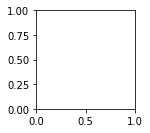

In [9]:
find_mrbles.inspect()

## Create Reference spectra

In [10]:
# Channel settings
DECODE_CHANNELS = slice('l-435','l-780')  # Channel range for decoding
OBJECT_CHANNEL = 'Brightfield'  # Channel for bead finding

# Reference files
REF_FOLDER = {
    "Dy": r"C:\DATA\20170406 - Reference files - KARA",
    "Sm": r"C:\DATA\20170406 - Reference files - KARA",
    "Tm": r"C:\DATA\20170406 - Reference files - KARA",
    "Eu": r"C:\DATA\20170406 - Reference files - KARA",
    "bkg": r"C:\DATA\20170406 - Reference files - KARA"
}
REF_FILES = {"Dy" : "Dy_Solos_3_MMStack_Pos0.ome.tif",
             "Sm" : "Sm_solos_5_MMStack_Pos0.ome.tif",
             "Tm" : "Tm_solos_3_MMStack_Pos0.ome.tif",
             "Eu" : "Eu_solos_6_MMStack_Pos0.ome.tif",
             "bkg" : "20170320_blank_1_MMStack_Pos0.ome.tif"
}

In [11]:
spec_object = mrbles.References(REF_FOLDER, REF_FILES, OBJECT_CHANNEL, DECODE_CHANNELS)
spec_object.crop_x = slice(312, 712)
spec_object.crop_y = slice(312, 712)

In [12]:
spec_object.load()

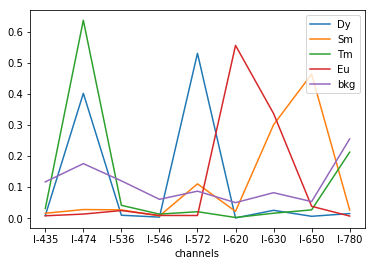

In [13]:
spec_object.plot()

## Spectral unmixing and get ratios

In [15]:
ratio_images = mrbles.Ratio(spec_object)

In [16]:
mrbles_images_combined = ratio_images.get(mrbles_images[:, :, DECODE_CHANNELS], 'Eu', combine_data=mrbles_images_combined)

In [17]:
mrbles_images_combined

{'63 nM': <xarray.DataArray (f: 24, c: 25, y: 900, x: 900)>
array([[[[ 168., ...,  159.],
         ..., 
         [ 146., ...,  137.]],

        ..., 
        [[   0., ...,    0.],
         ..., 
         [   0., ...,    0.]]],


       ..., 
       [[[ 147., ...,  164.],
         ..., 
         [ 142., ...,  152.]],

        ..., 
        [[   0., ...,    0.],
         ..., 
         [   0., ...,    0.]]]])
Coordinates:
  * c        (c) object 'Brightfield' 'Cy5' 'Dy' 'Dy_ratio' 'Eu' 'Sm' ...
Dimensions without coordinates: f, y, x, '125 nM': <xarray.DataArray (f: 28, c: 25, y: 900, x: 900)>
array([[[[ 151., ...,  155.],
         ..., 
         [ 163., ...,  127.]],

        ..., 
        [[   0., ...,    0.],
         ..., 
         [   0., ...,    0.]]],


       ..., 
       [[[ 151., ...,  154.],
         ..., 
         [ 144., ...,  143.]],

        ..., 
        [[   0., ...,    0.],
         ..., 
         [   0., ...,    0.]]]])
Coordinates:
  * c        (c) object 'Brightfiel

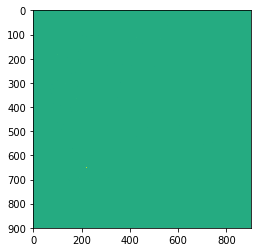

In [20]:
plt.figure()
plt.imshow(mrbles_images_combined['1000 nM', 0, 'Dy_ratio'])

In [21]:
mrbles_images_combined['Biotin'].c

<xarray.DataArray 'c' (c: 25)>
array(['Brightfield', 'Cy5', 'Dy', 'Dy_ratio', 'Eu', 'Sm', 'Sm_ratio', 'Tm',
       'Tm_ratio', 'bkg', 'l-435', 'l-474', 'l-536', 'l-546', 'l-572', 'l-620',
       'l-630', 'l-650', 'l-780', 'mask_bkg', 'mask_check', 'mask_full',
       'mask_inside', 'mask_outside', 'mask_ring'], dtype=object)
Coordinates:
  * c        (c) object 'Brightfield' 'Cy5' 'Dy' 'Dy_ratio' 'Eu' 'Sm' ...

## Extract data from each MRBLE

In [86]:
extract_data = mrbles.Extract()

In [87]:
extract_data.get(mrbles_images_combined[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5']], 
                 mrbles_images_combined[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']])

In [88]:
extract_data.data

Cy5.mask_bkg  Cy5.mask_full  Cy5.mask_inside  Cy5.mask_lbl  \
63 nM 0  0         1118.0         2310.0           2524.0           3.0   
         1         1110.0         1089.5           1107.0           4.0   
         2         1096.0         1059.0           1099.0           5.0   
         3         1126.5         1193.0           1237.0           6.0   
         4         1102.0         1626.5           1613.0           7.0   
         5         1037.0         3480.0           3050.0           8.0   
         6         1004.0         1348.0           1385.5           9.0   
      1  0         1086.0         1516.0           1552.0           3.0   
         1         1080.5         1161.0           1211.0           4.0   
         2         1102.0         1139.5           1180.0           5.0   
         3         1075.0         1160.0           1216.0           6.0   
         4         1090.0         1144.0           1202.0           7.0   
         5         1109.0         1195.0           1267.5          10.0   
         6         1115.0         1266.5           1327.0          12.0   
         7         1103.0         1065.5           1099.0          13.0   
         8         1110.0         1104.0           1120.0          15.0   
         9         1106.0         1556.0           1521.0          17.0   
         10        1090.5         1443.0           1437.5          18.0   
         11        1122.0         1638.0           1683.0          19.0   
         12        1115.0         1123.0           1135.0          20.0   
         13        1130.0         1383.0           1397.5          21.0   
         14        1116.0         1216.0           1240.5          22.0   
         15        1128.0         1298.5           1350.0          23.0   
         16        1126.0         1167.0           1189.0          24.0   
         17        1087.0         1383.0           1391.0          25.0   
         18        1105.0         1881.0           1878.0          26.0   
         19        1119.0         1553.0           1556.5          27.0   
         20        1097.0         1649.0           1620.0          28.0   
         21        1146.0         1712.0           1713.0          33.0   
         22        1145.0         1731.0           1756.0          34.0   
...                   ...            ...              ...           ...   
NIR   22 41        1123.0         1533.0           1573.0          52.0   
         42        1121.0         1141.0           1144.0          53.0   
         43        1123.0         1368.5           1378.0          54.0   
         44        1114.0         1110.0           1103.0          55.0   
         45        1133.0         1370.5           1390.0          56.0   
         46        1131.0         1711.5           1747.0          57.0   
         47        1121.5         1194.5           1212.5          60.0   
         48        1150.0         1293.0           1291.5          61.0   
         49        1095.0         1123.0           1146.0          63.0   
         50        1103.0         1023.0           1026.0          64.0   
         51        1085.0         1080.0           1108.0          67.0   
         52        1120.0         1264.0           1282.0          68.0   
         53        1077.0         1414.0           1464.0          69.0   
         54        1120.0         1135.0           1163.0          71.0   
         55        1116.0         1738.0           1834.0          73.0   
         56        1087.0         2373.5           2271.0          74.0   
         57        1105.0         1146.5           1157.0          75.0   
         58        1117.5         2661.5           2690.0          76.0   
         59        1112.5         1184.0           1179.5          77.0   
         60        1096.0         1124.5           1155.0          78.0   
         61        1081.0         1114.5           1149.0          79.0   
         62        1092.5         1140

In [89]:
extract_data.filter()

In [91]:
len(extract_data._dataframe[extract_data._dataframe.flag == True])

669

## Decode

In [218]:
# Target file location
TARGET_FOLDER = r"C:\DATA\CodeSets"
TARGET_FILE = os.path.join(TARGET_FOLDER, "20160226_DySmTm_48Codes.csv")
# TARGET_FILE = os.path.join(TARGET_FOLDER, "20160226_DySmTm_96Codes.csv")
target_load = np.genfromtxt(TARGET_FILE, delimiter=',')
# target = target_load[:, 1:4]  # Target set to Dy, Sm, Tm (no CeTb) Order: [CeTb, Dy, Sm, Tm]
codes_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,21,27,28,29,30,31,32,33,34,38,39,40,41,42,43,44,45,46]
target = target_load[codes_list, 1:4]
target_biotin = target_load[:, 1:4]
seq_list = pd.read_excel(r'C:\DATA\Huy\20181012_seq_list.xlsx')
sequences = seq_list.loc[codes_list]

In [398]:
bead_set = extract_data.data.loc[(['63 nM', '125 nM','250 nM','500 nM', '1000 nM','2000 nM'])]

In [399]:
bead_set

Cy5.mask_bkg  Cy5.mask_full  Cy5.mask_inside  Cy5.mask_lbl  \
63 nM   0  1         1110.0         1089.5           1107.0           4.0   
           2         1096.0         1059.0           1099.0           5.0   
           3         1126.5         1193.0           1237.0           6.0   
           4         1102.0         1626.5           1613.0           7.0   
           5         1037.0         3480.0           3050.0           8.0   
           6         1004.0         1348.0           1385.5           9.0   
        1  0         1086.0         1516.0           1552.0           3.0   
           2         1102.0         1139.5           1180.0           5.0   
           3         1075.0         1160.0           1216.0           6.0   
           4         1090.0         1144.0           1202.0           7.0   
           5         1109.0         1195.0           1267.5          10.0   
           6         1115.0         1266.5           1327.0          12.0   
           7         1103.0         1065.5           1099.0          13.0   
           8         1110.0         1104.0           1120.0          15.0   
           9         1106.0         1556.0           1521.0          17.0   
           10        1090.5         1443.0           1437.5          18.0   
           11        1122.0         1638.0           1683.0          19.0   
           12        1115.0         1123.0           1135.0          20.0   
           13        1130.0         1383.0           1397.5          21.0   
           14        1116.0         1216.0           1240.5          22.0   
           15        1128.0         1298.5           1350.0          23.0   
           16        1126.0         1167.0           1189.0          24.0   
           17        1087.0         1383.0           1391.0          25.0   
           18        1105.0         1881.0           1878.0          26.0   
           19        1119.0         1553.0           1556.5          27.0   
           20        1097.0         1649.0           1620.0          28.0   
           21        1146.0         1712.0           1713.0          33.0   
           22        1145.0         1731.0           1756.0          34.0   
           23        1148.0         1353.5           1387.0          35.0   
           24        1099.0         1422.0           1423.0          36.0   
...                     ...            ...              ...           ...   
2000 nM 33 24        1268.5         2533.0           2427.0          31.0   
           25        1292.0         2365.0           2449.0          32.0   
           26        1313.0         1387.0           1386.5          33.0   
           27        1356.5         8215.0           8031.5          34.0   
           28        1292.5        13208.0          11447.5          35.0   
           29        1407.0        16198.0          15036.5          36.0   
           30        1259.5         1638.0           1750.5          37.0   
           31        1264.0         2088.0           2107.0          38.0   
           32        1286.5         2007.0           1967.0          39.0   
           33        1292.0         1611.0           1581.0          41.0   
           34        1229.5         4946.0           4870.0          43.0   
           35        1176.0         1844.5           1778.5          45.0   
           36        1189.0         1665.0           1646.0          46.0   
           37        1177.0         1467.0           1464.5          47.0   
           38        1128.5         1234.5           1210.0          51.0   
           39        1311.0         2673.5           2671.0          52.0   
           40        1124.0         1186.0           1176.0          53.0   
           41        1116.0         1347.0           1334.0          54.0   
           42        1113.0         1397.0           1367.0          56.0   
           43        1108.0         1208.5           1180.5          57.0   
           

In [299]:
biotin_set = extract_data.data.loc[(['Biotin'])]

In [364]:
mrbles_decode_biotin = mrbles.Decode(target_biotin)

In [365]:
mrbles_decode_biotin.decode(biotin_set.loc[:,('Dy_ratio.mask_full', 'Sm_ratio.mask_full', 'Tm_ratio.mask_full')], combine=biotin_set)

Delta:  0.257389568684
Delta:  0.0728652203492
Delta:  0.035969536064
Delta:  0.0243082313365
Delta:  0.0239076465902
Delta:  0.0322527557073
Delta:  0.0364351478442
Delta:  0.0375969697415
Delta:  0.0427095314166
Delta:  0.0242994480604
Delta:  0.0179477142289
Delta:  0.00992598090275
Delta:  0.009079190221
Delta:  0.00934131944248
Delta:  0.00880890310204
Delta:  0.00500461846863
Delta:  0.00517295849969
Delta:  0.00327825327555
Delta:  0.002792508854
Delta:  0.00224026534784
Delta:  0.00236034486153
Delta:  0.00200537682109
Delta:  0.00132848301279
Delta:  0.000456212103621
Delta:  0.000930908269685
Delta:  0.000635620991484
Delta:  0.000779968366153
Delta:  0.000941359107083
Delta:  0.000956537572828
Delta:  0.00125160898704
Delta:  0.00067085905853
Delta:  0.0
Converged after: 32
Number of unique codes found: 46
Missing codes: [17 26]
Silhouette Coefficient: 0.602812441206
AIC: 225028.781851
BIC: 227910.598125


In [367]:
mrbles_decode = mrbles.Decode(target)

In [368]:
mrbles_decode.decode(bead_set.loc[:,('Dy_ratio.mask_full', 'Sm_ratio.mask_full', 'Tm_ratio.mask_full')], combine=bead_set)

Delta:  0.211668461741
Delta:  0.0499513136483
Delta:  0.0172721520727
Delta:  0.0321848389349
Delta:  0.0366028543072
Delta:  0.0316708153224
Delta:  0.0343685238782
Delta:  0.0413503167126
Delta:  0.0394354921953
Delta:  0.0294673673545
Delta:  0.0177489966215
Delta:  0.0137451965109
Delta:  0.0111889681927
Delta:  0.00888796584266
Delta:  0.00834449476122
Delta:  0.00724125473243
Delta:  0.00567369006312
Delta:  0.0045857164169
Delta:  0.00526438046924
Delta:  0.00409503299331
Delta:  0.00353528805546
Delta:  0.0027358189633
Delta:  0.00284353258786
Delta:  0.00193927823199
Delta:  0.00188453192279
Delta:  0.00142399486196
Delta:  0.0011247610479
Delta:  0.00107736701232
Delta:  0.0012973893298
Delta:  0.000317121859356
Delta:  0.000361456553042
Delta:  0.00035726845857
Delta:  0.000226504865862
Delta:  0.000149205353617
Delta:  7.75278095906e-05
Converged after: 35
Number of unique codes found: 35
Missing codes: None
Silhouette Coefficient: 0.610930346482
AIC: 625623.674976
BIC: 62

In [402]:
mrbles_final = mrbles.Analyze(seq_list=sequences)

In [370]:
bead_set = mrbles_decode.data

In [424]:
extract_set = mrbles_decode.data.loc[:, ('code', 'flag', 'Cy5.mask_ring')]
extract_set.loc[:, 'Cy5.mask_ring'] -= mrbles_decode.data.loc[:, ('Cy5.mask_bkg')]

c:\python36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [417]:
extract_set.index.rename(('set', 'file', 'index'));

In [432]:
extract_set

code  code   flag  Cy5.mask_ring
63 nM   0  1     26    26  False          -47.5
           2      9     9  False          -85.0
           3     30    30  False           -0.5
           4     22    22  False          553.0
           5      4     4  False         3663.0
           6     27    27  False          188.0
        1  0     22    22  False          378.5
           2      7     7  False          -32.5
           3     33    33  False            9.0
           4     33    33  False          -33.0
           5     10    10  False           30.0
           6     29    29  False           14.0
           7      4     4  False          -89.0
           8      0     0  False          -66.0
           9     22    22  False          559.0
           10    27    27  False          366.5
           11    24    24  False          233.5
           12     1     1  False          -15.5
           13     9     9  False          241.0
           14    12    12  False           27.0
           15    29    29  False           21.0
           16     7     7  False            2.0
           17    23    23  False          251.5
           18     3     3  False          800.0
           19    24    24  False          245.0
           20    22    22  False          601.0
           21     2     2  False          560.0
           22     2     2  False          533.5
           23    13    13  False          137.0
           24    24    24  False          307.5
...             ...   ...    ...            ...
2000 nM 33 24    28    28  False         1450.5
           25     5     5  False         1018.0
           26    11    11  False           76.0
           27     3     3  False         9327.5
           28     5     5  False        13823.5
           29    17    17  False        19484.0
           30    30    30  False          345.5
           31    21    21  False          569.0
           32    21    21  False          776.5
           33    30    30  False          384.0
           34    27    27  False         3746.5
           35    21    21  False          818.5
           36    21    21  False          614.0
           37    29    29  False          385.0
           38     0     0  False          160.5
           39     1     1  False         1422.0
           40     0     0  False          106.0
           41     0     0  False          242.0
           42     1     1  False          319.0
           43     0     0  False          130.0
           44     0     0  False          170.5
           45     0     0  False          334.0
           46     0     0  False          297.0
           47     0     0  False          195.0
           49     8     8  False           -6.0
           50     8     8  False          -53.5
           51     8     8  False          -77.0
           52     8     8  False           23.0
           53     8     8  False          -41.0
           54     4     4  False          202.0

[6671 rows x 4 columns]

In [436]:
extract_set.loc[[(extract_set.code == 1)], 'Cy5.mask_ring']

ValueError: cannot copy sequence with size 6671 to array axis with dimension 2

In [427]:
mrbles_final.extract(extract_set)

NotImplementedError: Indexing a MultiIndex with a DataFrame key is not implemented

In [ ]:
cy5

In [360]:
confidence = 0.95

colors = np.multiply(bead_set[(bead_set.confidence > confidence)].code.values.astype(int), np.ceil(255/96))

bead_ratios = go.Scatter3d(
    name='Bead ratios',
    x=bead_set.loc[(bead_set.confidence > confidence), ('rat_icp_dy')].values,
    y=bead_set.loc[(bead_set.confidence > confidence), ('rat_icp_sm')].values,
    z=bead_set.loc[(bead_set.confidence > confidence), ('rat_icp_tm')].values,
    text=bead_set.loc[(bead_set.confidence > confidence), ('code')].values,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios = go.Scatter3d(
    name='Target ratios',
    x=target[:,0],
    y=target[:,1],
    z=target[:,2],
    text=list(range(96)),
    mode='markers',
    marker=dict(
        size=4,
        color='Grey',
        opacity=0.5,
        symbol="diamond"
    )
)

# mean_ratios = go.Scatter3d(
#     name='GMM mean ratios',
#     x=gmix.means[:,0],
#     y=gmix.means[:,1],
#     z=gmix.means[:,2],
#     text=range(gmix._nclusters),
#     mode='markers',
#     marker=dict(
#         size=4,
#         color='Red',
#         opacity=0.5,
#         symbol="diamond"
#     )
# )

data = [bead_ratios, target_ratios]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

KeyError: 'the label [rat_icp_dy] is not in the [columns]'

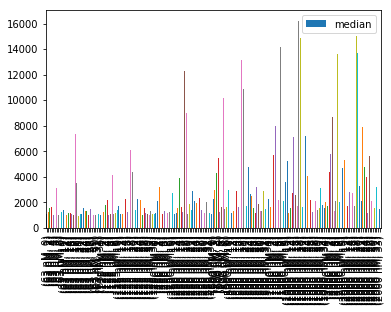

In [251]:
test.data.plot(kind='bar', y='median')

In [210]:
confidence = 0.95

colors = np.multiply(biotin_set[(biotin_set.confidence > confidence)].code.values.astype(int), np.ceil(255/len(target_biotin)))

bead_ratios = go.Scatter3d(
    name='Bead ratios',
    x=biotin_set.loc[(biotin_set.confidence > confidence), ('rat_icp_dy')].values,
    y=biotin_set.loc[(biotin_set.confidence > confidence), ('rat_icp_sm')].values,
    z=biotin_set.loc[(biotin_set.confidence > confidence), ('rat_icp_tm')].values,
    text=biotin_set.loc[(biotin_set.confidence > confidence), ('code')].values,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios = go.Scatter3d(
    name='Target ratios',
    x=target[:,0],
    y=target[:,1],
    z=target[:,2],
    text=list(range(96)),
    mode='markers',
    marker=dict(
        size=4,
        color='Grey',
        opacity=0.5,
        symbol="diamond"
    )
)

# mean_ratios = go.Scatter3d(
#     name='GMM mean ratios',
#     x=gmix.means[:,0],
#     y=gmix.means[:,1],
#     z=gmix.means[:,2],
#     text=range(gmix._nclusters),
#     mode='markers',
#     marker=dict(
#         size=4,
#         color='Red',
#         opacity=0.5,
#         symbol="diamond"
#     )
# )

data = [bead_ratios, target_ratios]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

KeyError: 'the label [rat_icp_dy] is not in the [columns]'